<a href="https://colab.research.google.com/github/Seemakumari05/Reviews_analysis/blob/main/Ybi_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn


In [2]:
import pandas as pd
df = pd.read_csv("/content/Review_dataset.csv")
df = df.dropna()  # Remove missing values


In [3]:
df.head()

,Rating,Review_Text
0,5.0,ధనానికి విలువైనది
1,5.0,शिपिंग बहुत तेज थी
2,4.0,శబ్ద నాణ్యత అద్భుతంగా ఉంది
3,3.0,उम्मीद से बेहतर
4,4.0,पैसे की पूरी कीमत


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review_Text'])  # Features
y = df['Rating']  # Target


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Value:", r2)


Mean Squared Error: 1.0342150579565714
R-squared Value: 0.3548672702925951


In [20]:
import matplotlib.pyplot as plt
import numpy as np

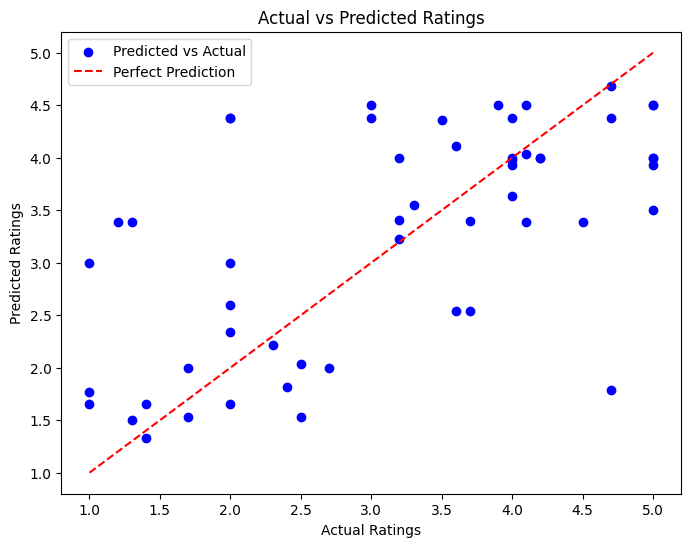

In [23]:
plt.figure(figsize=(8, 6))

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plot the line of perfect prediction (y = x)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()


In [9]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv("/content/train_80.csv").dropna()
test_df = pd.read_csv("/content/test_20.csv").dropna()


In [10]:
train_df.head()

,Rating,Review_Text
0,4.8,लंबी बैटरी
1,2.0,బ్యాటరీ జీవిత కాలం మంచిది కాదు
2,1.0,మళ్లీ కొనను
3,4.1,ఆశించినదానికంటే మెరుగ్గా ఉంది
4,2.8,బ్కెమెరా నిరాశ కలిగించాయి


In [12]:
test_df.head()

,Rating,Review_Text
0,2.0,शानदार डिज़ाइन
1,4.0,शानदार डिज़ाइन
2,4.7,अच्छी बैटरी और वॉटरप्रूफ
3,3.2,సాధారణ నాణ్యత
4,3.6,यह उत्पाद खरीदें!


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [14]:
# Fit on train data and transform both train and test
X_train = vectorizer.fit_transform(train_df['Review_Text'])
X_test = vectorizer.transform(test_df['Review_Text'])

In [15]:
# Target Variables
y_train = train_df['Rating']
y_test = test_df['Rating']

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# Training Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Train Mean Squared Error:", train_mse)
print("Train R-squared Value:", train_r2)


Train Mean Squared Error: 0.4547764722488458
Train R-squared Value: 0.7001197924285891


In [19]:

# Testing Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", test_mse)
print("Test R-squared Value:", test_r2)

Test Mean Squared Error: 1.0169271683346066
Test R-squared Value: 0.3656512782577612


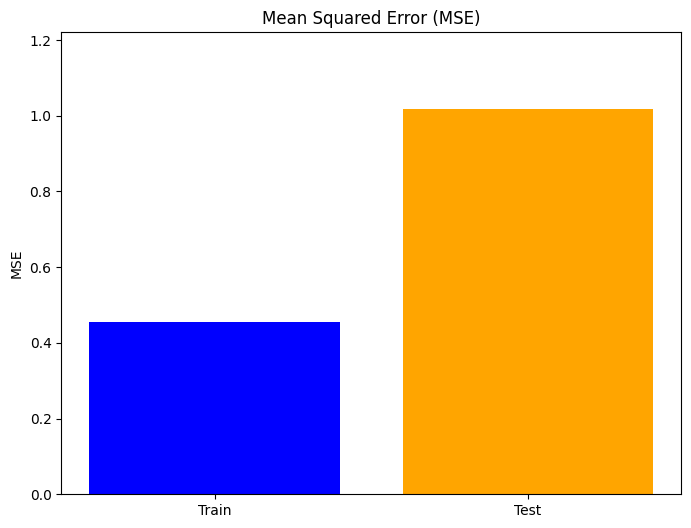

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [train_mse, test_mse], color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(train_mse, test_mse) * 1.2)  # Adjust y-axis for clarity
plt.show()

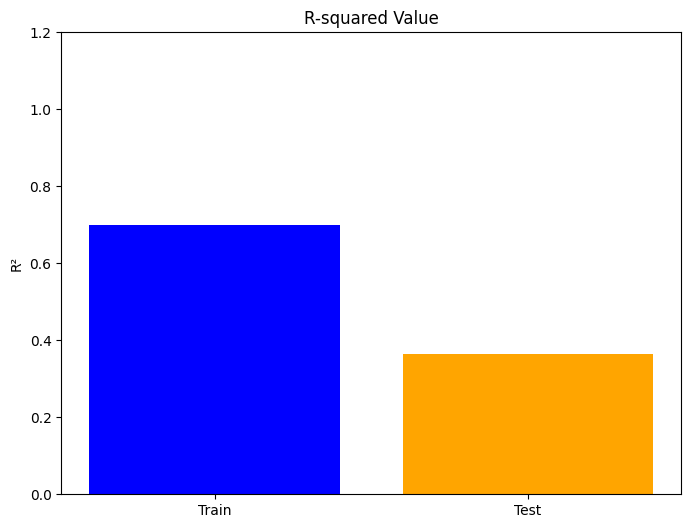

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [train_r2, test_r2], color=['blue', 'orange'])
plt.title('R-squared Value')
plt.ylabel('R²')
plt.ylim(0, 1.2)  # R² is between 0 and 1, so adjust y-axis accordingly
plt.show()